In [1]:
# 多维数组
import numpy as np
np.arange(0, 60, 10).reshape(-1, 1) + np.arange(0, 6)

array([[ 0,  1,  2,  3,  4,  5],
       [10, 11, 12, 13, 14, 15],
       [20, 21, 22, 23, 24, 25],
       [30, 31, 32, 33, 34, 35],
       [40, 41, 42, 43, 44, 45],
       [50, 51, 52, 53, 54, 55]])

![](http://ww2.sinaimg.cn/large/006tNc79gy1g54fuolp7qj30us09ugmj.jpg)

In [7]:
import numpy as np
persontype = np.dtype({
    'names':['name', 'age', 'weight'],
    'formats':['S32','i', 'f']})
a = np.array([("Zhang",32,75.5),("Wang",24,65.2)],
    dtype=persontype)
a.dtype

dtype([('name', 'S32'), ('age', '<i4'), ('weight', '<f4')])

In [8]:
a[0]["name"]

b'Zhang'

In [9]:
b=a[:]["age"] # 或者a["age"]
b

array([32, 24], dtype=int32)

In [10]:
a.tofile("test.bin")

In [12]:
x = np.linspace(0, 2*np.pi, 10)
x

array([0.        , 0.6981317 , 1.3962634 , 2.0943951 , 2.7925268 ,
       3.4906585 , 4.1887902 , 4.88692191, 5.58505361, 6.28318531])

In [14]:
y = np.sin(x)
y

array([ 0.00000000e+00,  6.42787610e-01,  9.84807753e-01,  8.66025404e-01,
        3.42020143e-01, -3.42020143e-01, -8.66025404e-01, -9.84807753e-01,
       -6.42787610e-01, -2.44929360e-16])

In [22]:
t=np.sin(x,x)
t

array([ 0.00000000e+00,  5.64171154e-01,  7.40064184e-01,  6.90196075e-01,
        3.29138324e-01, -3.29138324e-01, -6.90196075e-01, -7.40064184e-01,
       -5.64171154e-01, -2.44929360e-16])

In [23]:
id(t)==id(x)

True

sin函数的第二个参数也是x，那么它所做的事情就是对x中的每给值求正弦值，并且把结果保存到x中的 对应的位置中。此时函数的返回值仍然是整个计算的结果，只不过它就是x，因此两个变量的id是相同 的(变量t和变量x指向同一块内存区域)。

In [26]:
import time
import math
import numpy as np
x = [i * 0.001 for i in range(1000000)]
start = time.clock()
for i, t in enumerate(x):
    x[i] = math.sin(t)
print ("math.sin:", time.clock() - start)
x = [i * 0.001 for i in range(1000000)]
x = np.array(x)
start = time.clock()
np.sin(x,x)
print ("numpy.sin:", time.clock() - start)


math.sin: 0.26958200000000065
numpy.sin: 0.011201999999999934


在我的电脑上计算100万次正弦值，numpy.sin比math.sin快10倍多。这得利于numpy.sin在C语言级 别的循环计算。numpy.sin同样也支持对单个数值求正弦，例如:numpy.sin(0.5)。不过值得注意的 是，对单个数的计算math.sin则比numpy.sin快得多了，让我们看下面这个测试程序:

In [29]:
x = [i * 0.001 for i in range(1000000)]
start = time.clock()
for i, t in enumerate(x):
    x[i] = np.sin(t)
print ("numpy.sin loop:", time.clock() - start)


numpy.sin loop: 0.9909379999999999


![](http://ww4.sinaimg.cn/large/006tNc79gy1g54u89sb7fj31000eat9q.jpg)

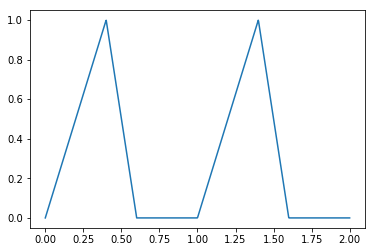

In [34]:
# ufunc 函数
def triangle_wave(x, c, c0, hc):
    x = x - int(x) # 三角波的周期为1，因此只取x坐标的小数部分进行计算 
    if x >= c: r = 0.0
    elif x < c0: r = x / c0 * hc
    else: r = (c-x) / (c-c0) * hc
    return r
x = np.linspace(0, 2, 1000)
y = np.array([triangle_wave(t, 0.6, 0.4, 1.0) for t in x])
import pylab
%matplotlib inline
pylab.plot(x,y)

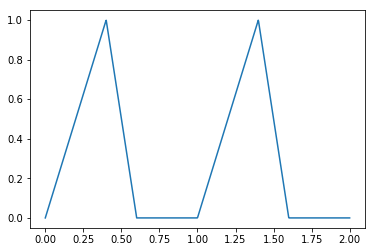

In [39]:
triangle_ufunc = np.frompyfunc( lambda x: triangle_wave(x, 0.6, 0.4, 1.0), 1, 1)
y2 = triangle_ufunc(x)
pylab.plot(x,y2)

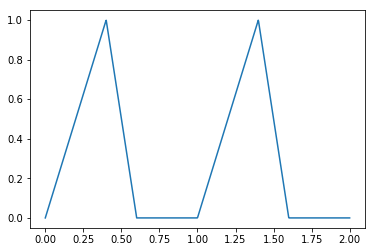

In [42]:
def triangle_func(c, c0, hc):
    def trifunc(x):
        x = x - int(x) # 三角波的周期为1，因此只取x坐标的小数部分进行计算 
        if x >= c: r = 0.0
        elif x < c0: r = x / c0 * hc
        else: r = (c-x) / (c-c0) * hc
        return r
# 用trifunc函数创建一个ufunc函数，可以直接对数组进行计算, 不过通过此函数 # 计算得到的是一个Object数组，需要进行类型转换
    return np.frompyfunc(trifunc, 1, 1)

y3 = triangle_func(0.6, 0.4, 1.0)(x)
pylab.plot(x,y3)

In [48]:
# 2.2.1 广播
a = np.arange(0, 60, 10).reshape(-1, 1)
b = np.arange(0, 5)
print(a,b)
c = a + b
c

[[ 0]
 [10]
 [20]
 [30]
 [40]
 [50]] [0 1 2 3 4]


array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44],
       [50, 51, 52, 53, 54]])

In [49]:
b.shape=1,5
b = b.repeat(6,axis=0)
b

array([[0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4]])

In [50]:
a = a.repeat(5, axis=1)
a

array([[ 0,  0,  0,  0,  0],
       [10, 10, 10, 10, 10],
       [20, 20, 20, 20, 20],
       [30, 30, 30, 30, 30],
       [40, 40, 40, 40, 40],
       [50, 50, 50, 50, 50]])

In [61]:
x,y = np.ogrid[0:5,0:5]
print(x,y)

[[0]
 [1]
 [2]
 [3]
 [4]] [[0 1 2 3 4]]



The following command must be run outside of the IPython shell:

    $ pip install mayavi

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


(100, 100) (100, 100) (100, 100)


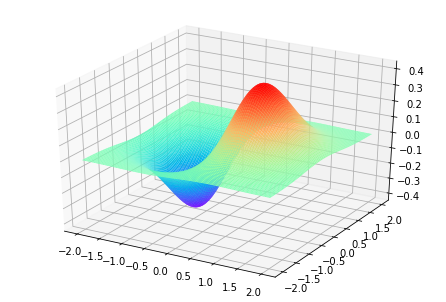

In [17]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
x, y = np.ogrid[-2:2:100j, -2:2:100j]
x, y = np.meshgrid(x, y)
Z = x * np.exp( - x**2 - y**2)
print(x.shape,y.shape,Z.shape)
ax.plot_surface(x, y, Z, rstride=1, cstride=1, cmap=plt.get_cmap('rainbow'))

In [19]:
#矩阵运算
a = np.matrix([[1,2,3],[5,5,6],[7,9,9]])
a*(a**-1)

matrix([[ 1.00000000e+00,  1.66533454e-16, -1.11022302e-16],
        [ 0.00000000e+00,  1.00000000e+00, -4.44089210e-16],
        [ 4.44089210e-16,  5.55111512e-17,  1.00000000e+00]])

In [21]:
>>> a = np.arange(12).reshape(2,3,2)
>>> b = np.arange(12,24).reshape(2,2,3)
>>> c = np.dot(a,b)
c

array([[[[ 15,  16,  17],
         [ 21,  22,  23]],

        [[ 69,  74,  79],
         [ 99, 104, 109]],

        [[123, 132, 141],
         [177, 186, 195]]],


       [[[177, 190, 203],
         [255, 268, 281]],

        [[231, 248, 265],
         [333, 350, 367]],

        [[285, 306, 327],
         [411, 432, 453]]]])

In [22]:
>>> a = np.random.rand(10,10)
>>> b = np.random.rand(10)
>>> x = np.linalg.solve(a,b)
x

array([ 2.73695436,  0.18047663, -7.29674575,  7.10576595, -2.63135337,
        3.3225001 ,  9.68655269, -0.63660393, -5.58567911,  1.2206806 ])

In [23]:
#文件存取
>>> a = np.arange(0,12)
>>> a.shape = 3,4
>>> a.tofile("a.bin")
>>> b = np.fromfile("a.bin", dtype=np.int32)
b

array([ 0,  0,  1,  0,  2,  0,  3,  0,  4,  0,  5,  0,  6,  0,  7,  0,  8,
        0,  9,  0, 10,  0, 11,  0], dtype=int32)

In [24]:
>>> np.save("a.npy", a)
>>> c = np.load( "a.npy" )
c

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [31]:
>>> a = np.array([[1,2,3],[4,5,6]])
>>> b = np.arange(0, 1.0, 0.1)
>>> c = np.sin(b)
>>> np.savez("result.npz", a, b, sin_array = c)
>>> r = np.load("result.npz")
for i in r:
    print(i)
    print(r[i])
    print("--------")

sin_array
[0.         0.09983342 0.19866933 0.29552021 0.38941834 0.47942554
 0.56464247 0.64421769 0.71735609 0.78332691]
--------
arr_0
[[1 2 3]
 [4 5 6]]
--------
arr_1
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
--------


In [33]:
>>> a = np.arange(0,12,0.5).reshape(4,-1)
>>> np.savetxt("a.txt", a) # 缺省按照'%.18e'格式保存数据，以空格分隔 
>>> np.loadtxt("a.txt")
>>> np.savetxt("a.txt", a, fmt="%d", delimiter=",") #改为保存为整数，以逗号分隔
>>> np.loadtxt("a.txt",delimiter=",") # 读入的时候也需要指定逗号分隔

array([[ 0.,  0.,  1.,  1.,  2.,  2.],
       [ 3.,  3.,  4.,  4.,  5.,  5.],
       [ 6.,  6.,  7.,  7.,  8.,  8.],
       [ 9.,  9., 10., 10., 11., 11.]])

In [40]:
>>> a = np.arange(8)
>>> b = np.add.accumulate(a)
>>> c = a + b
>>> f = file("result.npy", "wb")
>>> np.save(f, a) # 顺序将a,b,c保存进文件对象f >>> np.save(f, b)
>>> np.save(f, c)
>>> f.close()
>>> f = file("result.npy", "rb")
>>> np.load(f) # 顺序从文件对象f中读取内容

NameError: name 'file' is not defined